### DS-207: Kaggle Competition | EEG Seizure Prediction Competition

>Epilepsy afflicts nearly 1% of the world's population, and is characterized by the occurrence of spontaneous seizures. For many patients, anticonvulsant medications can be given at sufficiently high doses to prevent seizures, but patients frequently suffer side effects. For 20-40% of patients with epilepsy, medications are not effective. Even after surgical removal of epilepsy, many patients continue to experience spontaneous seizures. Despite the fact that seizures occur infrequently, patients with epilepsy experience persistent anxiety due to the possibility of a seizure occurring.

>Seizure forecasting systems have the potential to help patients with epilepsy lead more normal lives. In order for electrical brain activity (EEG) based seizure forecasting systems to work effectively, computational algorithms must reliably identify periods of increased probability of seizure occurrence. If these seizure-permissive brain states can be identified, devices designed to warn patients of impeding seizures would be possible. Patients could avoid potentially dangerous activities like driving or swimming, and medications could be administered only when needed to prevent impending seizures, reducing overall side effects.\n",

From the competition [homepage](https://www.kaggle.com/c/melbourne-university-seizure-prediction).

### Goal for this Notebook:
* Explore time series feature extractions using statsmodels and scipy,
* Data manipulation using pandas,
* Use scikit-learn to select features, perform cross validation and build predictive models,

#### Required Libraries:
* [NumPy](http://www.numpy.org/)
* [IPython](http://ipython.org/)
* [Pandas](http://pandas.pydata.org/)
* [SciKit-Learn](http://scikit-learn.org/stable/)
* [SciPy](http://www.scipy.org/)
* [Matplotlib](http://matplotlib.org/)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os.path
from scipy.io import loadmat
from scipy.signal import welch

### Normal v.s Preictal Signals

In [6]:
dataFolder = '../input'
normal = loadmat(os.path.join(dataFolder,'normal.mat'))['data']
preictal = loadmat(os.path.join(dataFolder,'preictal.mat'))['data']

In [7]:
normal.shape

(240000, 16)

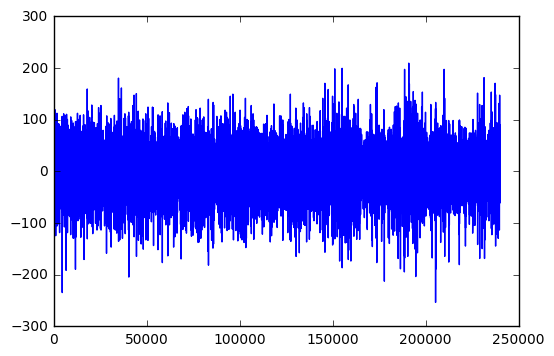

In [8]:
plt.plot(normal[:,0])
plt.show()

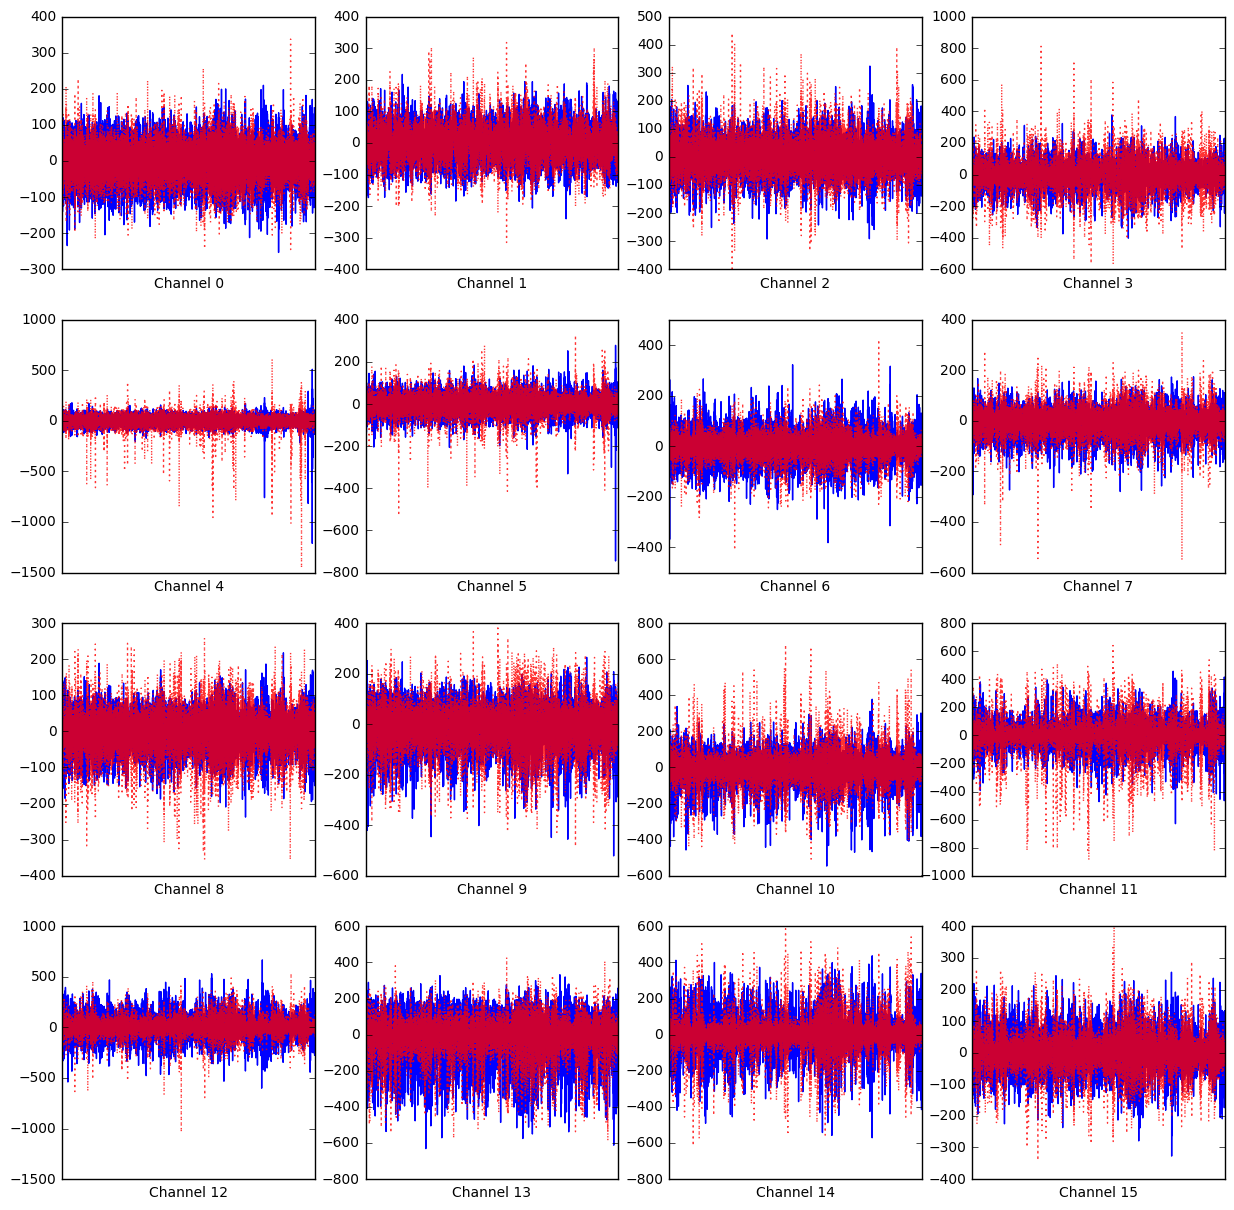

In [9]:
plt.figure(figsize=(15,15))
t = np.linspace(0,600,normal.shape[0])#600 second data
for channel in range(0,normal.shape[1]):
    plt.subplot(4, 4, channel+1)
    plt.plot(t,normal[:,channel],'b')
    # overlay preictal signal
    plt.plot(t,preictal[:,channel],'r:',alpha=0.8)
    plt.xlabel('Channel %d'%(channel))
    plt.xticks([])
plt.show()

### Frequency Domain

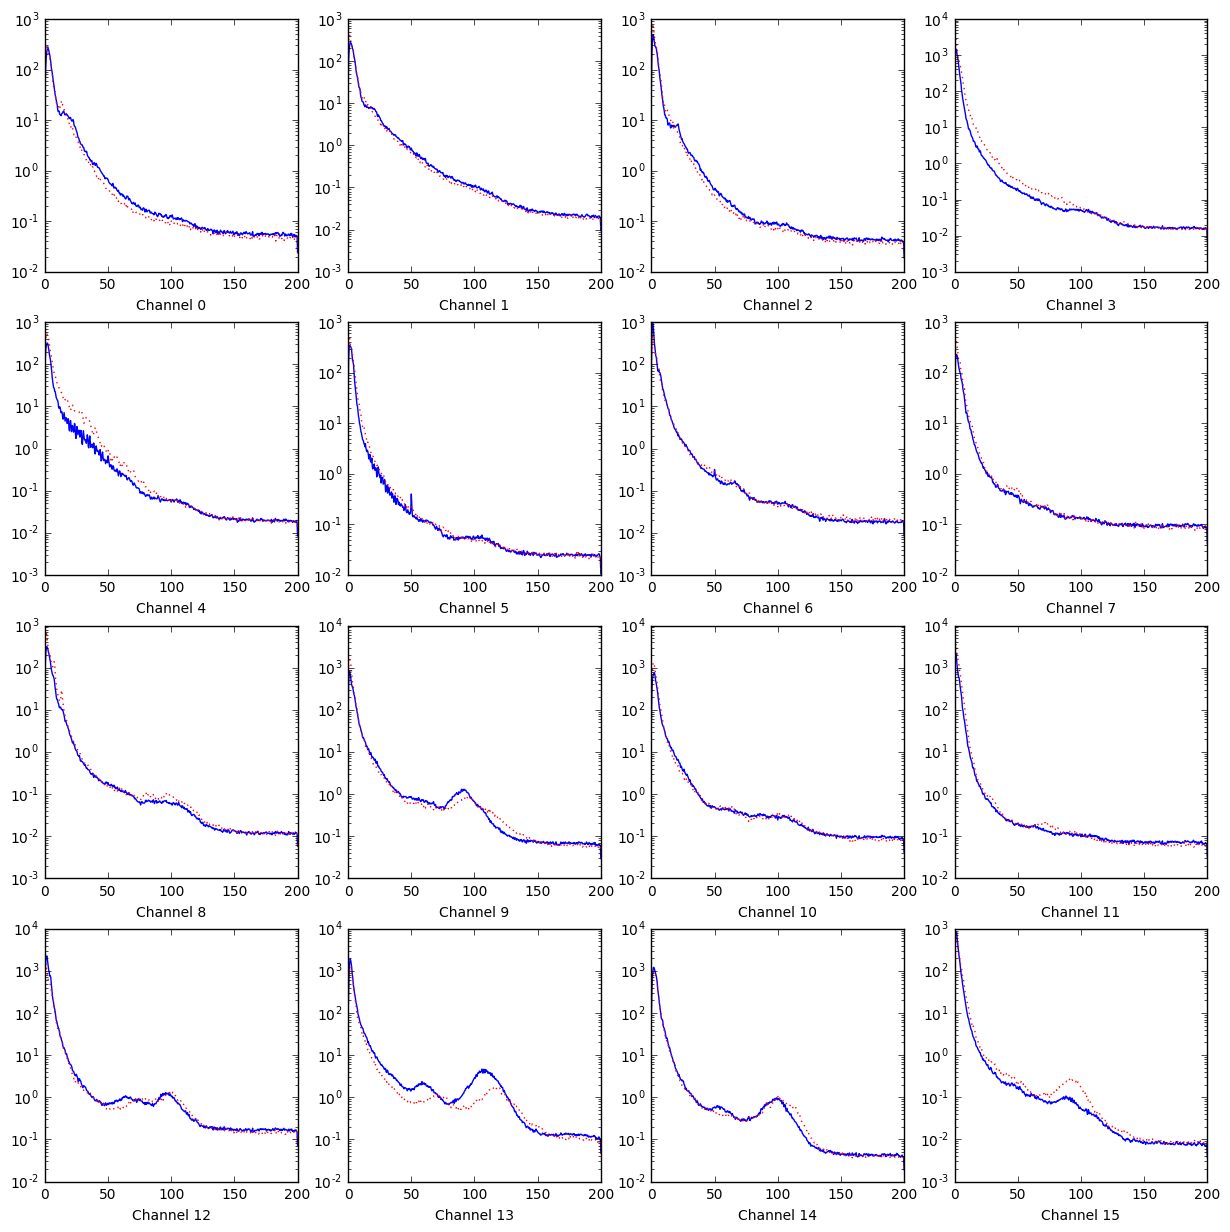

In [10]:
fs = 400 # unit: Hz
plt.figure(figsize=(15,15))

for channel in range(0,normal.shape[1]):
    plt.subplot(4, 4, channel+1)
    f, Pnormal = welch(normal[:,channel], fs, nperseg=1024)
    f, Ppreictal = welch(preictal[:,channel], fs, nperseg=1024)
    plt.semilogy(f, Pnormal)
    plt.semilogy(f, Ppreictal, 'r:')
    plt.xlabel('Channel %d'%(channel))
plt.show()

### Multi-Channel Features

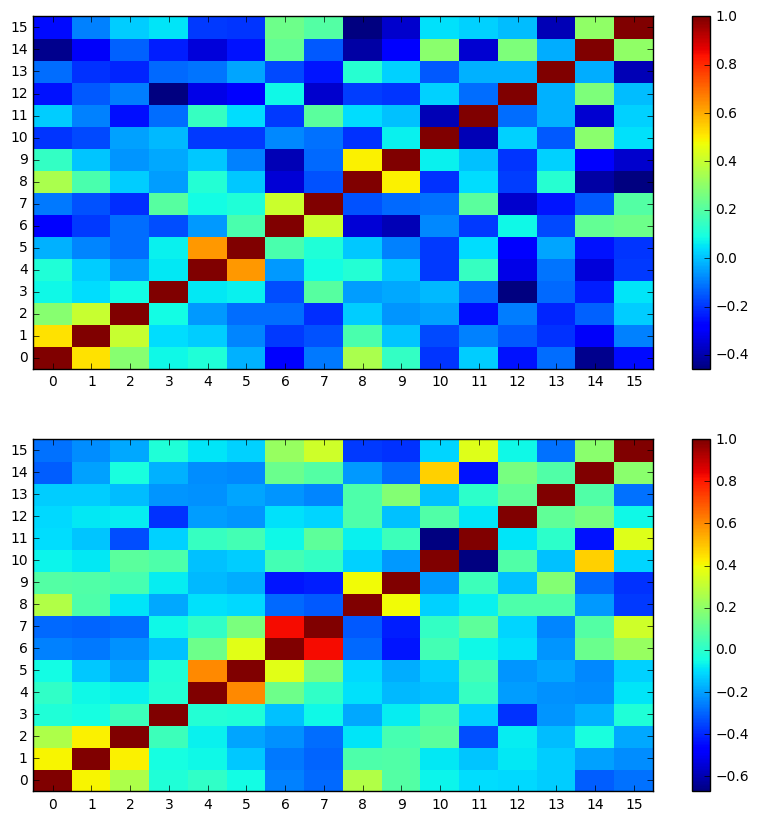

In [11]:
from numpy import corrcoef

plt.figure(figsize=(10,10))
Rnormal = corrcoef(normal.T)
plt.subplot(2,1,1)
plt.pcolor(Rnormal)
plt.yticks(np.arange(0.5,16.5),range(0,16))
plt.xticks(np.arange(0.5,16.5),range(0,16))
plt.colorbar()

Rpreictal = corrcoef(preictal.T)
plt.subplot(2,1,2)
plt.pcolor(Rpreictal)
plt.yticks(np.arange(0.5,16.5),range(0,16))
plt.xticks(np.arange(0.5,16.5),range(0,16))
plt.colorbar()

plt.show()

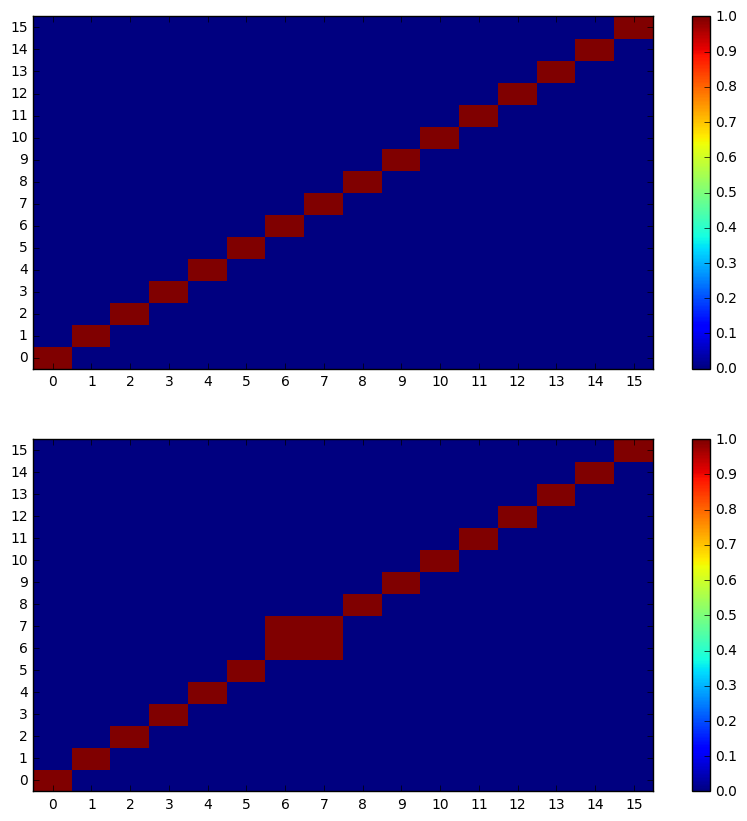

In [12]:
from numpy import corrcoef

# only keep highly correlated channels
plt.figure(figsize=(10,10))
Rnormal = corrcoef(normal.T)
plt.subplot(2,1,1)
plt.pcolor(abs(Rnormal)>0.7)
plt.yticks(np.arange(0.5,16.5),range(0,16))
plt.xticks(np.arange(0.5,16.5),range(0,16))
plt.colorbar()

Rpreictal = corrcoef(preictal.T)
plt.subplot(2,1,2)
plt.pcolor(abs(Rpreictal)>0.7)
plt.yticks(np.arange(0.5,16.5),range(0,16))
plt.xticks(np.arange(0.5,16.5),range(0,16))
plt.colorbar()

plt.show()

### Extracted Features

In [13]:
train = pd.read_csv(os.path.join(dataFolder,'train.csv'))
test = pd.read_csv(os.path.join(dataFolder,'test.csv'))

In [14]:
train.shape

(4972, 850)

In [15]:
train

,File,SigMean_C1,SigMean_C2,SigMean_C3,SigMean_C4,SigMean_C5,SigMean_C6,SigMean_C7,SigMean_C8,SigMean_C9,...,WaveletR8_C8,WaveletR8_C9,WaveletR8_C10,WaveletR8_C11,WaveletR8_C12,WaveletR8_C13,WaveletR8_C14,WaveletR8_C15,WaveletR8_C16,Class
0,1_7_0.mat,-0.288530,0.324564,-0.002718,0.050880,0.146694,-0.736724,-0.265787,-0.800872,-0.454978,...,0.394613,1.075273,-0.866328,-0.078471,-0.640318,-0.210430,-0.824698,0.523578,-0.091089,0
1,1_8_0.mat,-0.048981,-0.093086,-0.123211,0.576776,-0.059393,-0.626494,-0.288666,-1.123369,-1.058181,...,3.960875,3.582588,-0.785167,1.371965,-0.095059,-0.210288,-0.517351,3.076091,1.487048,0
2,1_9_0.mat,-0.168991,0.137907,0.106642,-0.239069,-0.695586,-1.335152,-0.421489,-1.152721,-0.869702,...,4.068216,3.496801,-0.770978,1.984995,0.122791,-0.209740,0.028066,3.771308,2.205124,0
3,1_10_0.mat,-0.199351,-0.573721,-0.527654,0.060454,-0.342314,-1.070089,-0.899636,-1.362659,-1.266849,...,3.214353,3.345645,-0.776387,1.197794,-0.173821,-0.210032,-0.429824,2.981368,1.241364,0
4,1_11_0.mat,0.017845,0.010380,-0.022627,0.094499,-0.046953,-0.936635,-0.546479,-0.991634,-0.663843,...,4.601992,3.607907,-0.779511,1.731818,-0.051429,-0.210167,-0.369933,4.052383,2.052193,0
5,1_12_0.mat,0.014489,0.130260,0.082293,0.071109,-0.102388,-1.003618,-0.422200,-1.093781,-0.668133,...,5.240694,4.073852,-0.767021,1.792692,-0.015426,-0.210365,-0.517251,3.994455,2.011985,0
6,1_13_0.mat,-0.655157,0.457431,0.140928,0.072871,-0.366381,-1.075830,-0.403581,-1.694735,-0.391248,...,5.449587,2.865873,-0.748247,1.190386,-0.160518,-0.209625,0.293477,2.675517,2.167857,0
7,1_14_0.mat,0.576938,-0.021378,1.319599,-0.323885,-1.541729,-0.644021,-0.693023,-3.264855,1.226745,...,5.731851,4.206076,-0.651534,2.545810,0.387698,-0.209287,0.332244,4.419004,2.935790,0
8,1_15_0.mat,0.508465,-0.365782,-0.653625,-0.290081,0.490278,0.147102,-0.857894,-0.593983,-0.182086,...,-0.408528,0.264590,-0.894032,-0.706963,-0.830039,-0.210508,-0.961791,-0.352436,-0.911083,0
9,1_16_0.mat,-0.017030,0.316921,0.026681,0.078928,-0.083321,-0.622562,-0.509687,-0.653605,-0.235385,...,-1.645358,-0.752254,-0.931867,-1.095465,-0.994557,-0.210540,-1.031693,-1.033472,-1.365559,0


In [12]:
train.columns

Index([u'File', u'SigMean_C1', u'SigMean_C2', u'SigMean_C3', u'SigMean_C4',
       u'SigMean_C5', u'SigMean_C6', u'SigMean_C7', u'SigMean_C8',
       u'SigMean_C9',
       ...
       u'WaveletR8_C8', u'WaveletR8_C9', u'WaveletR8_C10', u'WaveletR8_C11',
       u'WaveletR8_C12', u'WaveletR8_C13', u'WaveletR8_C14', u'WaveletR8_C15',
       u'WaveletR8_C16', u'Class'],
      dtype='object', length=850)

In [13]:
test.columns

Index([u'File', u'SigMean_C1', u'SigMean_C2', u'SigMean_C3', u'SigMean_C4',
       u'SigMean_C5', u'SigMean_C6', u'SigMean_C7', u'SigMean_C8',
       u'SigMean_C9',
       ...
       u'WaveletR8_C7', u'WaveletR8_C8', u'WaveletR8_C9', u'WaveletR8_C10',
       u'WaveletR8_C11', u'WaveletR8_C12', u'WaveletR8_C13', u'WaveletR8_C14',
       u'WaveletR8_C15', u'WaveletR8_C16'],
      dtype='object', length=849)

### DS-207: From loading data to submission

>In this session, we are going to load the data into memory, perform preprocessing, select features, train classifiers and generate submission. The framework presented here is suitable for binary classification competitions/problems.

In [14]:
class Datawarehouse():
    def __init__(self):
        # Initialize Datawarehouse.
        pass
    
    def read_data():
        # Read in training and testing data for further processing
        pass
    
    def select_features(vec):
        """ Select features given a boolean vector

        Arguments:
            vec (ndarray): a boolean vector to indicate what features to keep
        """
        pass
    
    def gen_submission(ypred):
        """ Generate submission files based on given prediction results

        Arguments:
            ypred (ndarray): a numeric vector storing probability
        """
        pass
    

In [17]:
 #!/usr/bin/env python -W ignore::DeprecationWarning
class Model():
    def __init__(self, mdl_type, param):
        """ Initialize classififer based on classifier type and related parameters

        Arguments:
            mdl_type (string): a string to tell which classifier to use
            param: a dictionary to store related parameters
            
        """
        
        pass

    def train(self, data_in, data_out):
        """ Train classifier based on input data and corresponding labels

        Arguments:
            data_in (ndarray): feature matrix for training classifier
            data_out (ndarray): binary output labels for each row of feature matrix
        
        Returns:
            val_mean: mean of k-fold cross validation score
            val_std: standard deviation of k-fold cross validation score
            
        """
        pass
    
    def score_kfold(self, data_in, data_out, num_fold):
        """ Get the score of k-fold cross validation

        Arguments:
            data_in (ndarray): feature matrix for training classifier
            data_out (ndarray): binary output labels for each row of feature matrix
            num_fold: number of folds for cross validation 
        
        Returns:
            val_mean: mean of k-fold cross validation score
            val_std: standard deviation of k-fold cross validation score
            
        """
        pass

    def predict(self, data_in):
        """ Predict output probability given input data

        Arguments:
            data_in (ndarray): feature matrix for generating prediction
        
        Returns:
            data_out (ndarray): output probability vector for each row of feature matrix
            
        """
        pass


In [16]:
''' Main workflow '''
# initialize data warehouse
MyData = Datawarehouse()

# read in data

# setup model parameters

# perform cross validation

# train the model with all data

# generate submission

### Analyze submission results

In [ ]:
# why it happens?

### Use L1-Regularized Logistic Regression to Select Features

In [18]:
# Use l1-regularization to select features
param = {}
param['C'] = 1
param['penalty'] = 'l1'
param['max_iter'] = 200
param['n_jobs'] = 4
MyFeatureSelector = Model('lr', param)

In [ ]:
# Eliminate un-used features
KeepVec = MyFeatureSelector.clf.coef_
MyData.select_features(KeepVec[0])

In [19]:
# Initialize a random forest classifier
param = {}
param['n_estimators'] = 800
param['criterion'] = 'entropy'
param['max_features'] = 'sqrt'
param['max_depth'] = 10
param['min_samples_split'] = 8
param['random_state'] = 4242
MyModel = Model('rf', param)

In [ ]:
# Get K-fold cross validation scores
val_mean, val_std = MyModel.score_group_kfold(MyData.train_in, MyData.train_out)
print(val_mean, val_std)

In [ ]:
# Train classifier using all the data
MyModel.train(MyData.train_in, MyData.train_out)

In [ ]:
# Get probability prediction of test data
ypred = MyModel.predict(MyData.test_in)

In [ ]:
# Finally, generate submission file
MyMode.gen_submission(ypred)

### Parameter Tuning